In [4]:
# Task 2

# Movie rating Prediction

# 2.1 Data Loading & Understanding

import pandas as pd
df = pd.read_csv("ratings.csv", encoding="latin1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
# Shape of the Dataset

print(df.shape[0])
print(df.shape[1])


15509
10


In [7]:
# Column names and its Datatypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [20]:
# Statistics of Dataset

print(df.describe(include="all"))

# For object (categorical) types
df.describe(include='object')

         Name    Year Duration  Genre       Rating Votes      Director  \
count   15509   14981     7240  13632  7919.000000  7920         14984   
unique  13838     102      182    485          NaN  2034          5938   
top     Mamta  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq        7     410      240   2780          NaN   227            58   
mean      NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std       NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min       NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%       NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%       NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%       NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max       NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   13125   12365  
unique         4718    4891    4820

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Mamta,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [14]:
# Check shape and column names
print(df.shape)
print(df.columns.to_list)


(15509, 10)
<bound method IndexOpsMixin.tolist of Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')>


In [15]:
# Check data types
print(df.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [19]:
# 2.2 EDA

# Count of nulls per column
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [25]:
# Unique values and distributions

print(df['Genre'].value_counts())
print(df['Director'].value_counts().head(10))
print(df['Actor 1'].value_counts().head(10))
print(df['Actor 2'].value_counts().head(10))
print(df['Actor 3'].value_counts().head(10))

Genre
Drama                              2780
Action                             1289
Thriller                            779
Romance                             708
Drama, Romance                      524
                                   ... 
Documentary, Biography, History       1
Documentary, Adventure, Drama         1
Crime, Horror, Romance                1
Animation, Drama, Adventure           1
Adventure, Horror                     1
Name: count, Length: 485, dtype: int64
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
David Dhawan        44
B.R. Ishara         44
Name: count, dtype: int64
Actor 1
Ashok Kumar           158
Jeetendra             140
Dharmendra            140
Mithun Chakraborty    133
Amitabh Bachchan      129
Rajesh Khanna         122
Dev Anand              93
Shashi Kapoor          91
Akshay Kumar           88
Sanjeev 

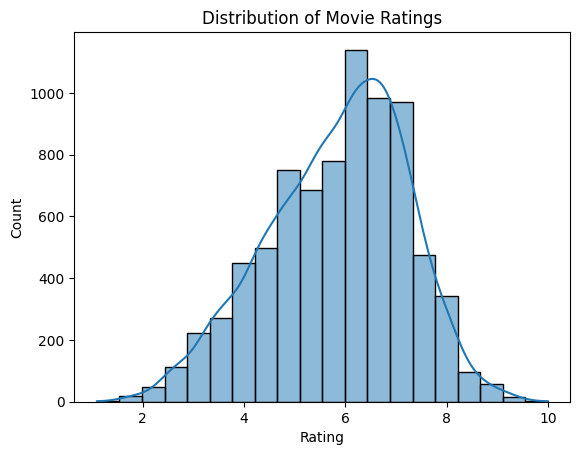

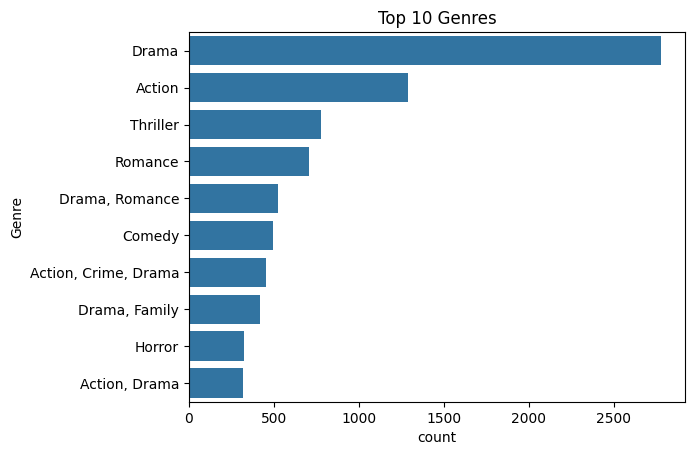

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

# Genre count plot (if it's one genre per movie)
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.show()


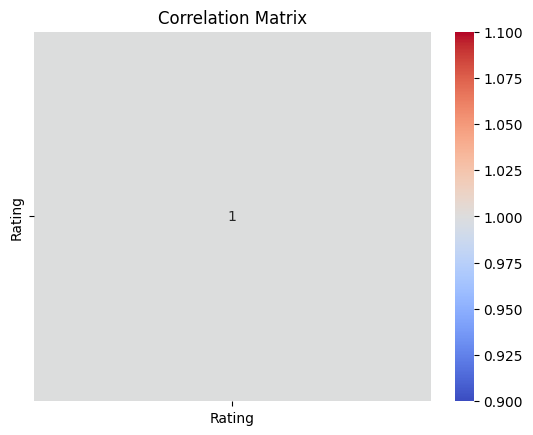

In [27]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
# 2.3 Data Preproceesing & Feature Engineering

# Drop Rows with Missing Values

df = df.dropna()

In [29]:
# Limit Genre to Top 10

top_genres = df['Genre'].value_counts().nlargest(10).index
df = df[df['Genre'].isin(top_genres)]

In [30]:
# Label Encoding of Categorical Columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])

In [32]:
# Separate Features and Target Variable

X = df.drop(['Rating', 'Name'], axis=1)
y = df['Rating']

In [33]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 2.4 Model Building & Evaluation

# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model 1: Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluation of Model 1

print("🔹 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R² Score:", r2_score(y_test, lr_preds))

# Model 2 : Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation of Model 2

print("🔹 Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))


🔹 Linear Regression Performance:
MAE: 0.9828305707415604
MSE: 1.5875674352393265
R² Score: 0.12008341493568275
🔹 Random Forest Performance:
MAE: 0.8317490909090909
MSE: 1.233760952727273
R² Score: 0.3161822923472698


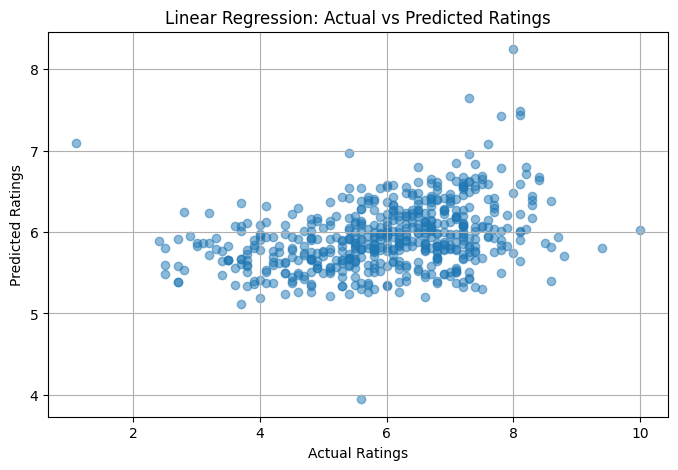

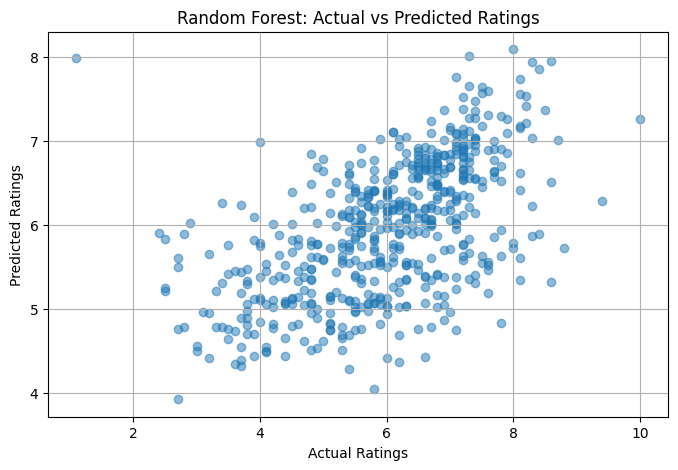

In [42]:
# Visualize Predictions

# Model 1
plt.figure(figsize=(8,5))
plt.scatter(y_test, lr_preds, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Linear Regression: Actual vs Predicted Ratings")
plt.grid(True)
plt.show()

# Model 2

plt.figure(figsize=(8,5))
plt.scatter(y_test, rf_preds, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Random Forest: Actual vs Predicted Ratings")
plt.grid(True)
plt.show()

In [53]:
def show_top_mappings(name, encoder):
    print(f"\n📊 Top 10 {name} (Code ➝ Name):")
    for i, label in enumerate(encoder.classes_[:10]):
        code = encoder.transform([label])[0]
        print(f"{code} ➝ {label}")

# Call for each field
show_top_mappings("Genres", genre_le)
show_top_mappings("Directors", director_le)
show_top_mappings("Actor 1", actor1_le)
show_top_mappings("Actor 2", actor2_le)
show_top_mappings("Actor 3", actor3_le)

import numpy as np

# ✍️ Take input from user
print("\nPlease enter the following input values:")

genre_code     = int(input("Genre code: "))
duration       = float(input("Duration (in minutes): "))
year           = int(input("Release Year (e.g., 2005): "))
director_code  = int(input("Director code: "))
actor1_code    = int(input("Actor 1 code: "))
actor2_code    = int(input("Actor 2 code: "))
actor3_code    = int(input("Actor 3 code: "))
votes          = float(input("Number of Votes: "))

# ✅ Prepare input
user_input = np.array([[genre_code, duration, year, director_code,
                        actor1_code, actor2_code, actor3_code, votes]])

# 🎯 Predict rating
predicted_rating = rf_model.predict(user_input)

print("\n🎯 Predicted Movie Rating:", round(predicted_rating[0], 2))



📊 Top 10 Genres (Code ➝ Name):
0 ➝ Action
1 ➝ Action, Adventure
2 ➝ Action, Adventure, Biography
3 ➝ Action, Adventure, Comedy
4 ➝ Action, Adventure, Crime
5 ➝ Action, Adventure, Drama
6 ➝ Action, Adventure, Family
7 ➝ Action, Adventure, Fantasy
8 ➝ Action, Adventure, History
9 ➝ Action, Adventure, Horror

📊 Top 10 Directors (Code ➝ Name):
0 ➝ A B Arjun
1 ➝ A. Bhimsingh
2 ➝ A. Habib
3 ➝ A. Jagannathan
4 ➝ A. Karim
5 ➝ A. Kodandarami Reddy
6 ➝ A. Majid
7 ➝ A. Muthu
8 ➝ A. Raja
9 ➝ A. Rashid

📊 Top 10 Actor 1 (Code ➝ Name):
0 ➝ A. Muthu
1 ➝ A. Nairang
2 ➝ A.K. Hangal
3 ➝ A.K. Misra
4 ➝ A.N. Ansari
5 ➝ A.R. Rahman
6 ➝ A.R.S.
7 ➝ A.S. Ravindra Babu
8 ➝ Aachi Manorama
9 ➝ Aadar Jain

📊 Top 10 Actor 2 (Code ➝ Name):
0 ➝ A. Hussain
1 ➝ A. Hussein
2 ➝ A.H. Shore
3 ➝ A.K. Hangal
4 ➝ A.V.M. Rajan
5 ➝ Aachi Manorama
6 ➝ Aadar Jain
7 ➝ Aadil Khan
8 ➝ Aaditya Pratap Singh
9 ➝ Aahana Kumra

📊 Top 10 Actor 3 (Code ➝ Name):
0 ➝ A. Shah Shikarpuri
1 ➝ A.H. Shore
2 ➝ A.K. Agnihotri
3 ➝ A.K. Hangal
4 ➝ 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
